<a href="https://colab.research.google.com/github/SaddamRafiq/Crypto-Thesis/blob/main/EDA_YFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd

# Cryptocurrency symbols to fetch
crypto_symbols = ["BTC-USD", "ETH-USD", "BNB-USD", "DOGE-USD", "ADA-USD"]

# Fetch historical data
crypto_data = yf.download(crypto_symbols, start="2020-01-01", end="2023-12-31", group_by="ticker")

# Save data to a CSV file for later use
crypto_data.to_csv("cryptocurrency_data.csv")

[*********************100%***********************]  5 of 5 completed


In [ ]:
# Load the dataset from the saved CSV file
crypto_data = pd.read_csv("cryptocurrency_data.csv", header=[0, 1], index_col=0, parse_dates=True)

# Inspect the dataset structure
print("Data Overview:")
print(crypto_data.head())

Data Overview:
Ticker        BNB-USD                                                         \
Price            Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2020-01-01  13.730962  13.873946  13.654942  13.689083  13.689083  172980718   
2020-01-02  13.698126  13.715548  12.989974  13.027011  13.027011  156376427   
2020-01-03  13.035329  13.763709  13.012638  13.660452  13.660452  173683857   
2020-01-04  13.667442  13.921914  13.560008  13.891512  13.891512  182230374   
2020-01-05  13.888340  14.410801  13.886547  14.111019  14.111019  202552703   

Ticker      DOGE-USD                                ...     ETH-USD  \
Price           Open      High       Low     Close  ...         Low   
Date                                                ...               
2020-01-01  0.002028  0.002052  0.002021  0.002033  ...  129.198288   
2020-01-02  0.002034  0.002110  0.001983  0.002009  ...  126

In [ ]:
# Check for missing values
missing_values = crypto_data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Ticker    Price    
BNB-USD   Open         0
          High         0
          Low          0
          Close        0
          Adj Close    0
          Volume       0
DOGE-USD  Open         0
          High         0
          Low          0
          Close        0
          Adj Close    0
          Volume       0
ADA-USD   Open         0
          High         0
          Low          0
          Close        0
          Adj Close    0
          Volume       0
ETH-USD   Open         0
          High         0
          Low          0
          Close        0
          Adj Close    0
          Volume       0
BTC-USD   Open         0
          High         0
          Low          0
          Close        0
          Adj Close    0
          Volume       0
dtype: int64


In [ ]:
# Descriptive statistics for the entire dataset
print("\nDescriptive Statistics:")
print(crypto_data.describe())


Descriptive Statistics:
Ticker      BNB-USD                                                      \
Price          Open         High          Low        Close    Adj Close   
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     247.288703   254.386749   239.700369   247.457219   247.457219   
std      166.107652   171.363503   160.164369   165.917506   165.917506   
min        9.365420    10.236060     6.963391     9.386050     9.386050   
25%       37.781473    38.905196    36.393721    38.059960    38.059960   
50%      269.277817   275.874588   261.443817   269.447128   269.447128   
75%      333.260536   343.042183   324.275024   333.426468   333.426468   
max      676.315918   690.931946   634.549500   675.684082   675.684082   

Ticker                   DOGE-USD                                         ...  \
Price         Volume         Open         High          Low        Close  ...   
count   1.460000e+03  1460.000000  1460.000000  1460.000000  1

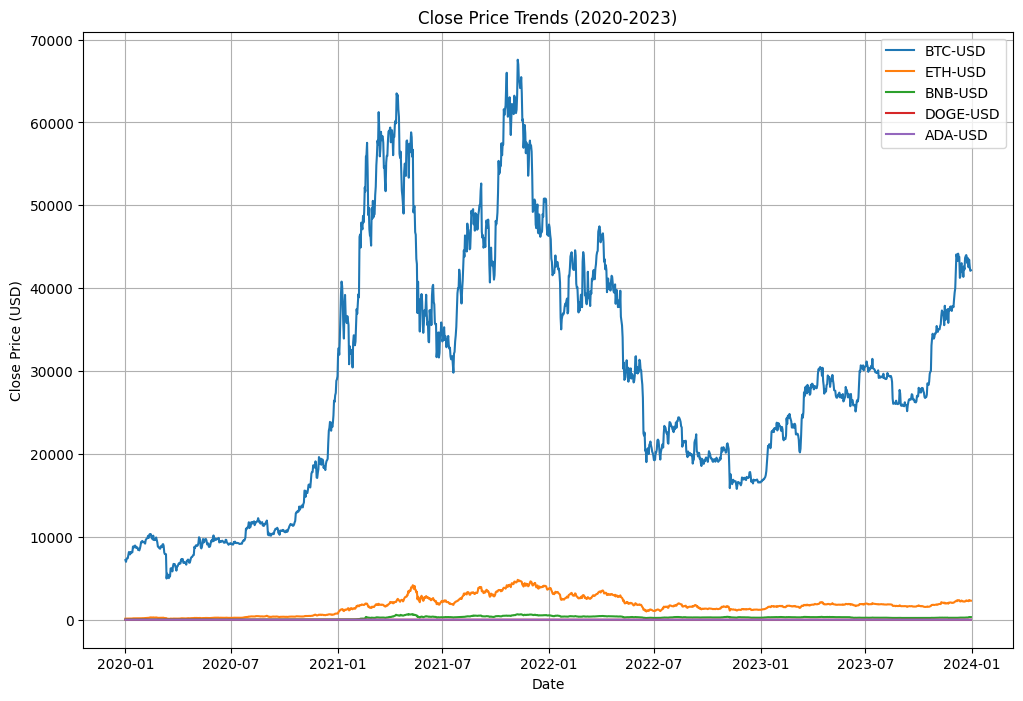

In [ ]:
import matplotlib.pyplot as plt

# Plot Close prices over time
plt.figure(figsize=(12, 8))
for symbol in ["BTC-USD", "ETH-USD", "BNB-USD", "DOGE-USD", "ADA-USD"]:
    plt.plot(crypto_data.index, crypto_data[(symbol, "Close")], label=symbol)

plt.title("Close Price Trends (2020-2023)")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

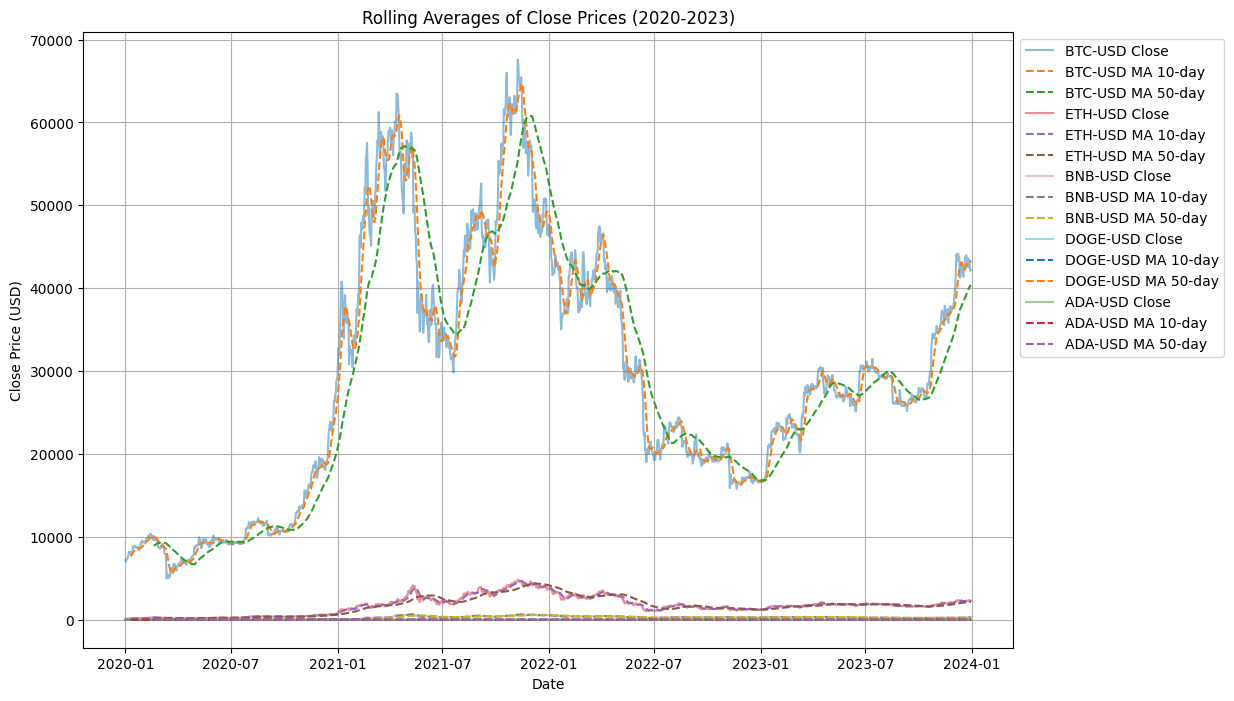

In [ ]:
# Plot rolling averages for Close prices
plt.figure(figsize=(12, 8))
for symbol in ["BTC-USD", "ETH-USD", "BNB-USD", "DOGE-USD", "ADA-USD"]:
    close_prices = crypto_data[(symbol, "Close")]
    ma_10 = close_prices.rolling(window=10).mean()
    ma_50 = close_prices.rolling(window=50).mean()

    plt.plot(close_prices, label=f"{symbol} Close", alpha=0.5)
    plt.plot(ma_10, label=f"{symbol} MA 10-day", linestyle="--")
    plt.plot(ma_50, label=f"{symbol} MA 50-day", linestyle="--")

plt.title("Rolling Averages of Close Prices (2020-2023)")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


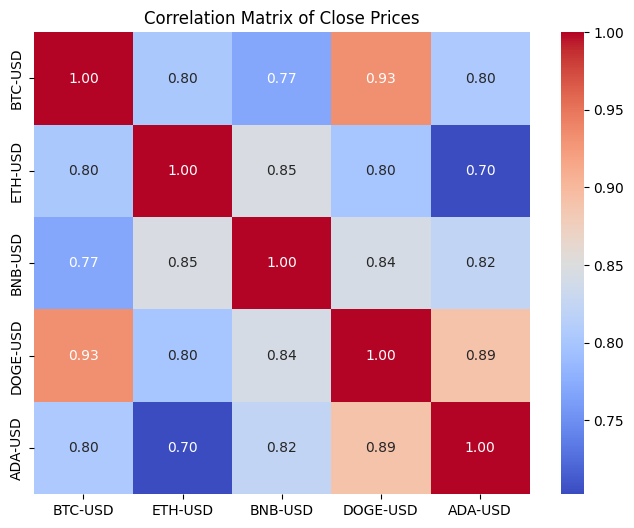

In [ ]:
import seaborn as sns

# Extract Close prices for correlation analysis
close_prices_df = crypto_data.loc[:, (slice(None), "Close")]
close_prices_df.columns = ["BTC-USD", "ETH-USD", "BNB-USD", "DOGE-USD", "ADA-USD"]

# Compute correlation matrix
correlation_matrix = close_prices_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix of Close Prices")
plt.show()


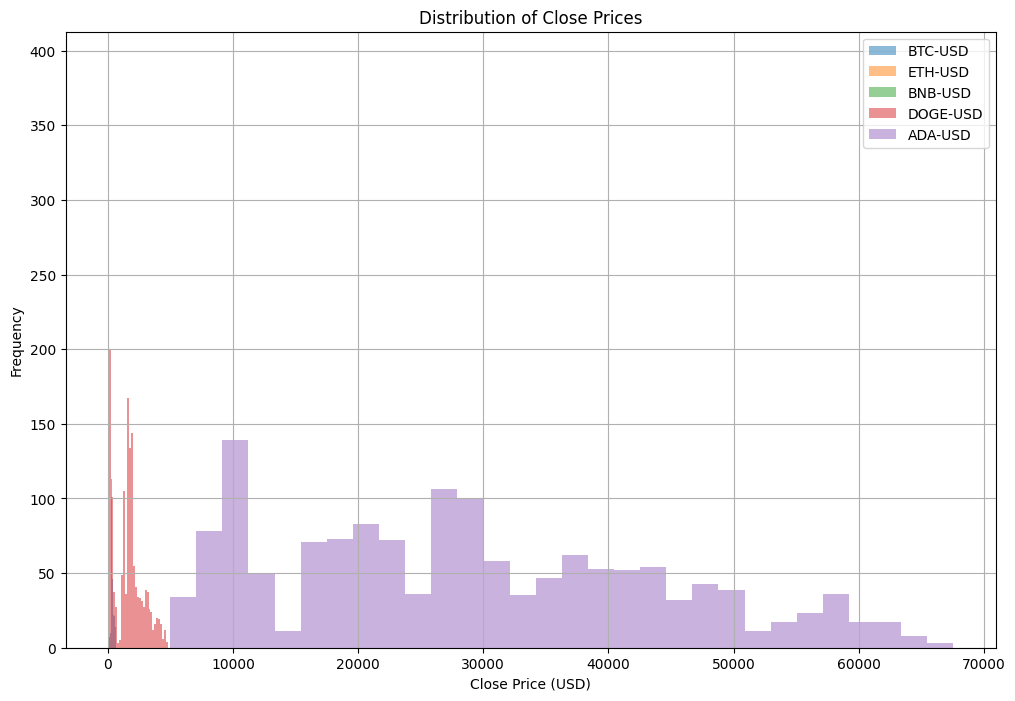

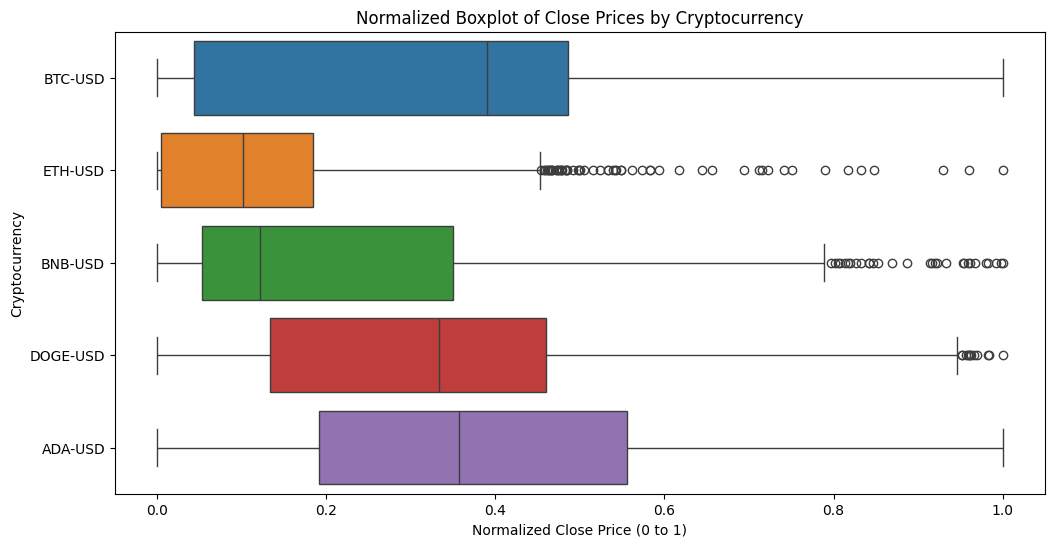

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 7.1: Histograms for Raw Price Distributions
plt.figure(figsize=(12, 8))
for symbol in close_prices_df.columns:
    plt.hist(close_prices_df[symbol], bins=30, alpha=0.5, label=symbol)
plt.title("Distribution of Close Prices")
plt.xlabel("Close Price (USD)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# Step 7.2: Normalize Data for Boxplot
# Use MinMaxScaler to normalize Close prices
scaler = MinMaxScaler()
normalized_close_prices = pd.DataFrame(
    scaler.fit_transform(close_prices_df),
    columns=close_prices_df.columns,
    index=close_prices_df.index
)

# Plot normalized boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=normalized_close_prices, orient="h")
plt.title("Normalized Boxplot of Close Prices by Cryptocurrency")
plt.xlabel("Normalized Close Price (0 to 1)")
plt.ylabel("Cryptocurrency")
plt.show()


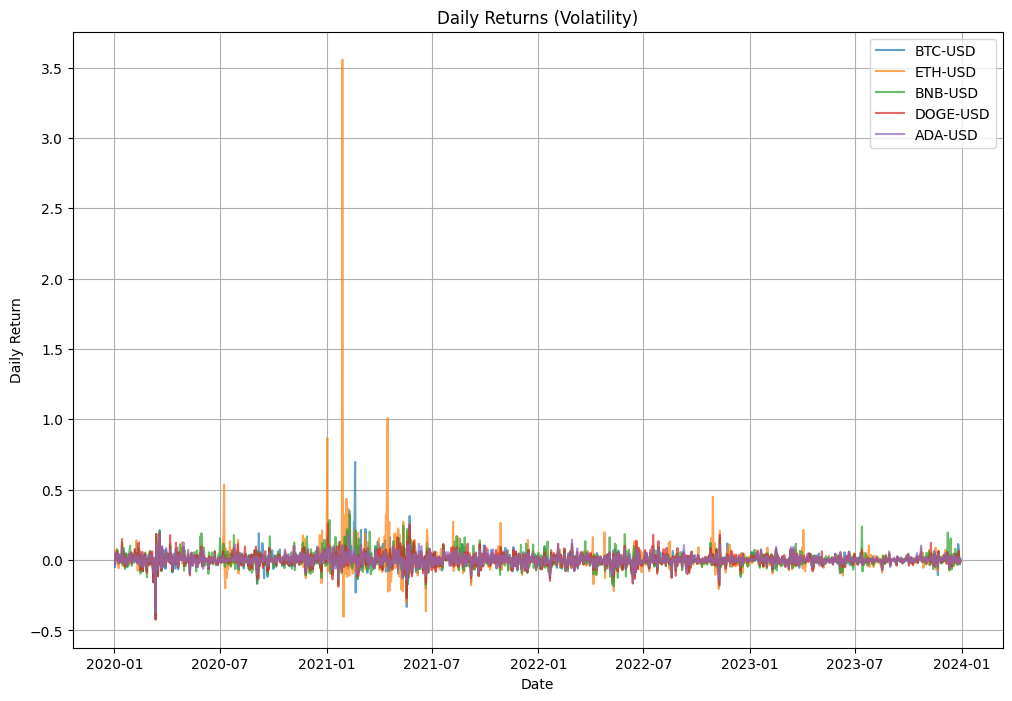


Daily Returns Summary Statistics:
           BTC-USD      ETH-USD      BNB-USD     DOGE-USD      ADA-USD
count  1459.000000  1459.000000  1459.000000  1459.000000  1459.000000
mean      0.003411     0.006364     0.003425     0.003021     0.001832
std       0.050767     0.118297     0.053938     0.045435     0.034811
min      -0.419046    -0.402570    -0.395672    -0.423472    -0.371695
25%      -0.015547    -0.022441    -0.023334    -0.017383    -0.013140
50%       0.001485     0.000000     0.000773     0.001659     0.000615
75%       0.022278     0.020176     0.025675     0.024695     0.016954
max       0.697604     3.555466     0.322384     0.259475     0.187465


In [ ]:
# Calculate daily returns
daily_returns = close_prices_df.pct_change()

# Plot daily returns
plt.figure(figsize=(12, 8))
for symbol in ["BTC-USD", "ETH-USD", "BNB-USD", "DOGE-USD", "ADA-USD"]:
    plt.plot(daily_returns.index, daily_returns[symbol], label=symbol, alpha=0.7)

plt.title("Daily Returns (Volatility)")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.grid(True)
plt.show()

# Summary statistics for daily returns
print("\nDaily Returns Summary Statistics:")
print(daily_returns.describe())


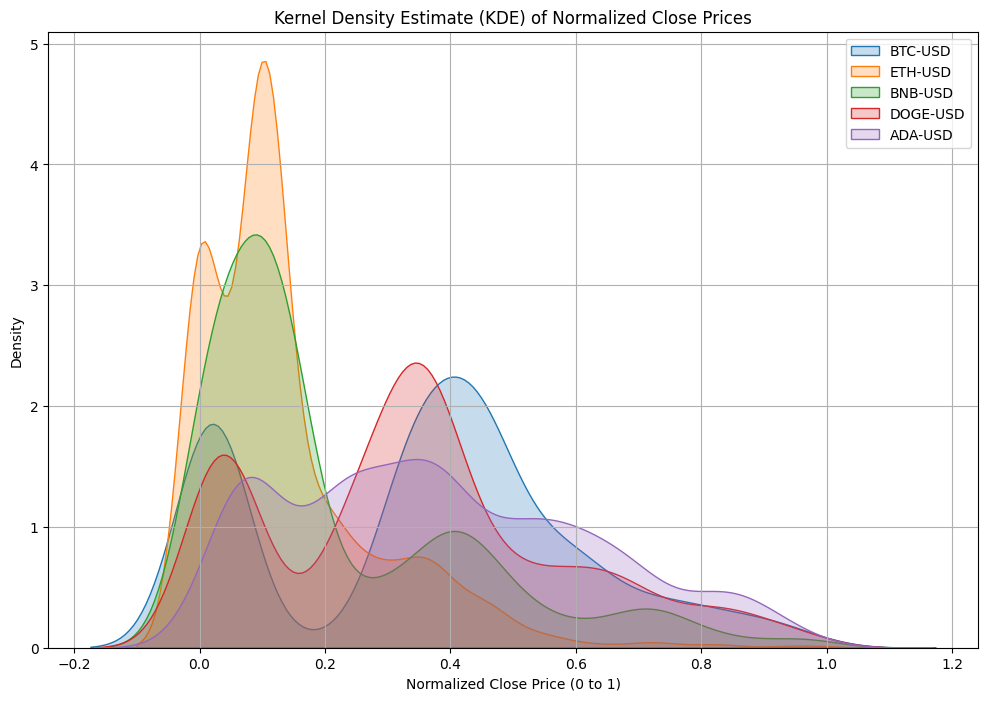

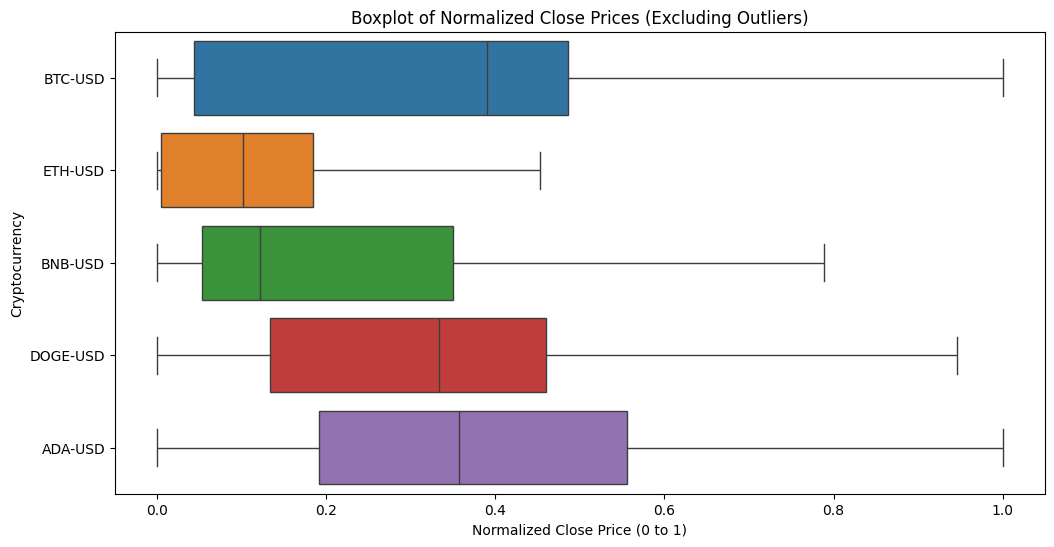

(  Cryptocurrency  Outlier Count
 0        BTC-USD              0
 1        ETH-USD             56
 2        BNB-USD             30
 3       DOGE-USD             12
 4        ADA-USD              0,
           Standard Deviation      Mean    Median
 BTC-USD             0.249014  0.357304  0.390307
 ETH-USD             0.143303  0.136844  0.101656
 BNB-USD             0.215857  0.210474  0.121525
 DOGE-USD            0.235726  0.341414  0.333283
 ADA-USD             0.241472  0.381981  0.356757)

In [ ]:
import numpy as np

# Step 1: Quantify Outliers
# Define outliers as points beyond 1.5 * IQR
outlier_counts = {}
for symbol in normalized_close_prices.columns:
    Q1 = normalized_close_prices[symbol].quantile(0.25)
    Q3 = normalized_close_prices[symbol].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = normalized_close_prices[(normalized_close_prices[symbol] < lower_bound) |
                                       (normalized_close_prices[symbol] > upper_bound)]
    outlier_counts[symbol] = len(outliers)

# Convert to a DataFrame for visualization
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=["Cryptocurrency", "Outlier Count"])

# Step 2: KDE Plots for Normalized Prices
plt.figure(figsize=(12, 8))
for symbol in normalized_close_prices.columns:
    sns.kdeplot(normalized_close_prices[symbol], label=symbol, fill=True)
plt.title("Kernel Density Estimate (KDE) of Normalized Close Prices")
plt.xlabel("Normalized Close Price (0 to 1)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Variance and Standard Deviation
variability_stats = normalized_close_prices.describe().T[['std', 'mean', '50%']]
variability_stats.rename(columns={'std': 'Standard Deviation', 'mean': 'Mean', '50%': 'Median'}, inplace=True)

# Step 4: Boxplot Without Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=normalized_close_prices, orient="h", showfliers=False)
plt.title("Boxplot of Normalized Close Prices (Excluding Outliers)")
plt.xlabel("Normalized Close Price (0 to 1)")
plt.ylabel("Cryptocurrency")
plt.show()

# Display outlier counts and variability statistics
outlier_counts_df, variability_stats
